In [191]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K


In [192]:
from keras.datasets import mnist

In [193]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [194]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [195]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [196]:
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


[11418 34714 10298 20565 17437 34861 44123 18635 55441 16749  8324  9321
  6405 43707 27652 13773 47444 13294 35527 32966 18857 44068 45091 24866
 38518]


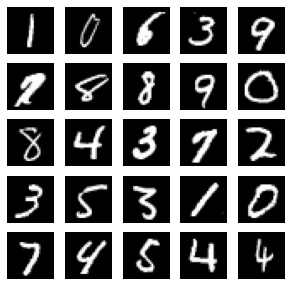

In [197]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
print(indexes)
#print((x_train[0]))
images = x_train[indexes]
labels = y_train[indexes]
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

In [198]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Conv2D, Flatten,MaxPool2D
import keras.losses

In [199]:
num_labels = len(np.unique(y_train))


In [200]:

x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test,-1)


In [201]:
x_train.shape

(60000, 28, 28, 1)

In [202]:
y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

In [203]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , input_shape = (28,28,1) , activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64 ,(3,3) ,activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10 , activation="softmax"))


In [204]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)              

In [205]:
model.compile (optimizer= 'adam' , loss = keras.losses.categorical_crossentropy , metrics=['accuracy'])



In [206]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor ='val_acc' , min_delta=  0.01, patience= 4, verbose= 1)

mc = ModelCheckpoint("./bestmodel.h5", monitor= "val_acc", verbose=1 ,save_best_only=True)

cb =[es,mc]

In [208]:
his = model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.0465 - val_accuracy: 0.9899
Epoch 2/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0500 - val_accuracy: 0.9893
Epoch 3/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0080 - accuracy: 0.9970 - val_loss: 0.0474 - val_accuracy: 0.9903
Epoch 4/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0495 - val_accuracy: 0.9899
Epoch 5/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0463 - val_accuracy: 0.9909
